# Homework


The homework is to prepare a report for the Ministry of Transport, revealing the nature and characteristics of flight delays. The report should help identify problem areas and contribute to decision-making. Therefore, strive not to state general facts, but to show problems. For example, the fact "the average departure delay is 15 minutes" by itself says little and does not help to understand why this is happening. On the contrary, a graph showing that on Mondays delays increase threefold compared to other days against the background of an increase in the number of flights and passengers suggests a possible cause of the problem: airports cannot cope with uneven load.

The report should be in the form of a notebook with a clear structure. At the beginning of the Markdown cell there is a brief description of the question under study (what we will study), then the code and all its outputs (tables, graphs, values), then again in the Markdown cell in which your brief conclusion is formulated.

The report should contain at least **5 results** confirmed by graphs. For variety of material, use different types of diagrams. All graphs should be provided with the necessary signatures (axis designations, title, color scheme legend).

To solve the problems, use the methods of the `pandas` library.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df_flights = pd.read_csv('flights.csv')

<ipython-input-2-45e6fcf2dcc2>:1: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_flights = pd.read_csv('flights.csv')


In [ ]:
# Фильтруем датасет -- убираем те рейсы для которых нет времени прибытия отправки или задержки

df_flights = df_flights[~(df_flights['ARRIVAL_TIME'].isna() | df_flights['DEPARTURE_TIME'].isna() | df_flights['ARRIVAL_DELAY'].isna())]

In [ ]:
# Делаем числовые идентификаторы использующиеся в случае докальных аэропортов строковыми

df_flights['ORIGIN_AIRPORT'] = df_flights['ORIGIN_AIRPORT'].apply(str)
df_flights['DESTINATION_AIRPORT'] = df_flights['DESTINATION_AIRPORT'].apply(str)

In [ ]:
# Выделяем датасет с задержанными рейсами -- будем считать задержанными рейсами те, что задержались больше чем на 30 минут

df_delays = df_flights[df_flights['ARRIVAL_DELAY'] > 30]

In [ ]:
df_flights

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,2015,12,31,4,B6,688,N657JB,LAX,BOS,2359,...,753.0,-26.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819075,2015,12,31,4,B6,745,N828JB,JFK,PSE,2359,...,430.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819076,2015,12,31,4,B6,1503,N913JB,JFK,SJU,2359,...,432.0,-8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819077,2015,12,31,4,B6,333,N527JB,MCO,SJU,2359,...,330.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Смотрим сколько всего рейсов отправилось из каждого аэропорта и сколько из них было задержанных
df_oa = pd.DataFrame({'all_count': df_flights['ORIGIN_AIRPORT'].value_counts(), 'del_count':  df_delays['ORIGIN_AIRPORT'].value_counts()})
# Фильтруем на случай если где-то повились отсутсвующие значения
df_oa = df_oa[~df_oa.isna().any(axis=1)]
# Получаем долю задержанных рейсов
df_oa['rel_count'] = df_oa['del_count'] / df_oa['all_count']

Text(0, 0.5, 'Кол-во аэропортов')

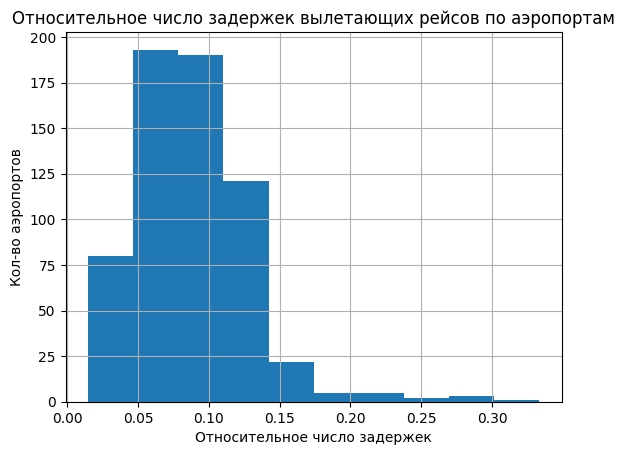

In [ ]:
df_oa['rel_count'].hist()
plt.title('Относительное число задержек вылетающих рейсов по аэропортам')
plt.xlabel('Относительное число задержек')
plt.ylabel('Кол-во аэропортов')

In [ ]:
import numpy as np

# Получаем 90% квантили количества рейсов и количества задержанных рейсов, чтобы выделить 10% самых загруженных по вылету и 10% самых проблемных аэропортов
np.quantile(df_oa['all_count'], 0.9), np.quantile(df_oa['rel_count'], 0.9)

(17512.799999999974, 0.132155625389636)

In [ ]:
big_oa_del = df_oa[(df_oa['all_count'] > 17500)].sort_values(by='rel_count', ascending=False)
big_oa_del.head(20)

# Выводим 20 самых проблемных аэропорты из 10% самых загруженных

,all_count,del_count,rel_count
ORIGIN_AIRPORT,,,
LGA,94834,15034.0,0.158530
ORD,276554,43132.0,0.155962
MIA,68301,9724.0,0.142370
JFK,91663,12859.0,0.140286
EWR,98341,13610.0,0.138396
PBI,22134,2997.0,0.135403
DEN,193402,26157.0,0.135247
PHL,64751,8742.0,0.135009
IAD,33664,4482.0,0.133139


Список вверху это список из аэропортов из топ-10% по пассажиропотоку и топ-10% по относительному количеству задержанных рейсов по вылету

In [ ]:
# Смотрим сколько всего рейсов прилетело в каждый аэропорт и сколько из них было задержанных
df_da = pd.DataFrame({'all_count': df_flights['DESTINATION_AIRPORT'].value_counts(), 'del_count':  df_delays['DESTINATION_AIRPORT'].value_counts()})
# Фильтруем на случай если где-то повились отсутсвующие значения
df_da = df_da[~df_da.isna().any(axis=1)]
# Получаем долю задержанных рейсов
df_da['rel_count'] = df_da['del_count'] / df_da['all_count']

Text(0, 0.5, 'Кол-во аэропортов')

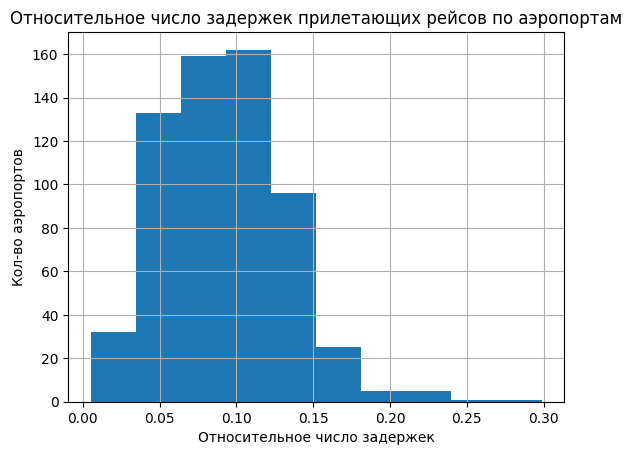

In [ ]:
df_da['rel_count'].hist()
plt.title('Относительное число задержек прилетающих рейсов по аэропортам')
plt.xlabel('Относительное число задержек')
plt.ylabel('Кол-во аэропортов')

In [ ]:
# Получаем 90% квантили количества рейсов и количества задержанных рейсов, чтобы выделить 10% самых загруженных по прилёту и 10% самых проблемных аэропортов

np.quantile(df_da['all_count'], 0.9), np.quantile(df_da['rel_count'], 0.9)

(17676.200000000008, 0.13985066290384224)

In [ ]:
big_da_del = df_da[(df_da['all_count'] > 17500)].sort_values(by='rel_count', ascending=False)
big_oa_del.head(20)

# Выводим 20 самых проблемных аэропорты из 10% самых загруженных на прилёт

,all_count,del_count,rel_count
ORIGIN_AIRPORT,,,
LGA,94834,15034.0,0.158530
ORD,276554,43132.0,0.155962
MIA,68301,9724.0,0.142370
JFK,91663,12859.0,0.140286
EWR,98341,13610.0,0.138396
PBI,22134,2997.0,0.135403
DEN,193402,26157.0,0.135247
PHL,64751,8742.0,0.135009
IAD,33664,4482.0,0.133139


In [ ]:
len(set(big_da_del.head(20).index).intersection(set(big_oa_del.head(20).index)))

# Количество аэропортов которые входят в топ-20 и по задержке прилётов и по задержке вылетов

10

## Выводы

1. Существуют проблемные аэропорты в которых рейсы задерживаются чаще обычного, среди них есть и крупные
2. Среди проблемных аэропортов задержки испытвают не только рейсы прилетающие в них, но и вылетающие.

In [ ]:
# Смотрим сколько всего рейсов отправилось в каждый из месяцев и сколько из них было задержанных
df_mo = pd.DataFrame({'all_count': df_flights['MONTH'].value_counts(), 'del_count':  df_delays['MONTH'].value_counts()})
# Фильтруем на случай если где-то повились отсутсвующие значения
df_mo = df_mo[~df_mo.isna().any(axis=1)]
# Получаем долю задержанных рейсов
df_mo['rel_count'] = df_mo['del_count'] / df_mo['all_count']

In [ ]:
df_mo

,all_count,del_count,rel_count
MONTH,,,
1,457013,56793,0.124270
2,407663,57601,0.141296
3,492138,55275,0.112316
4,479251,46346,0.096705
5,489641,54280,0.110857
6,492847,73381,0.148892
7,514384,66687,0.129644
8,503956,57801,0.114695
9,462153,33816,0.073171


Text(0.5, 1.0, 'Доля задержанных рейсов по месяцам')

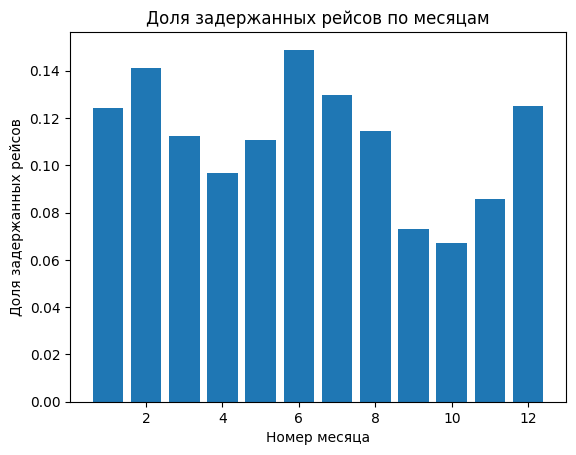

In [ ]:
plt.bar(df_mo.index, df_mo.rel_count)
plt.xlabel('Номер месяца')
plt.ylabel('Доля задержанных рейсов')
plt.title('Доля задержанных рейсов по месяцам')

In [ ]:
# Смотрим сколько всего рейсов отправилось в каждый из дней и сколько из них было задержанных
df_we = pd.DataFrame({
    'all_count': df_flights[['MONTH', 'DAY']].apply(tuple, axis=1).value_counts(),
    'del_count':  df_delays[['MONTH', 'DAY']].apply(tuple, axis=1).value_counts()
})
# Фильтруем на случай если где-то повились отсутсвующие значения
df_we = df_we[~df_we.isna().any(axis=1)]
# Получаем долю задержанных рейсов
df_we['rel_count'] = df_we['del_count'] / df_we['all_count']

Text(0.5, 1.0, 'Зависимость доли задержанных рейсов от их общего количества')

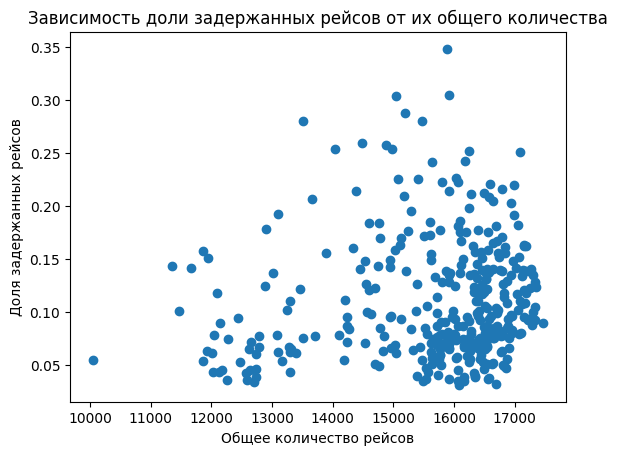

In [ ]:
plt.scatter(df_we.all_count, df_we.rel_count)
plt.xlabel('Общее количество рейсов за день')
plt.ylabel('Доля задержанных рейсов в этот день')
plt.title('Зависимость доли задержанных рейсов от их общего количества')

## Выводы
1. Задержка неравномерно распределена по месяцам, а сентябре-октябре их меньше всего, а в феврале и июне больше
2. Рейсы в среднем задерживаются чаще в дни когда рейсов больше

In [ ]:
# Границы интервалов на которые мы будем делить длины рейсов
bins = [250, 500, 750, 1000, 1250, 1500, 1750, 2000, 2250, 2500, 2750, 3000, 3250, 3500, 3750, 4000]

# Разбиваем длины рейсов по интервалам и считаем гистограмму
df_flights['DISTANCE_BINS'] = pd.cut(df_flights['DISTANCE'], bins=bins)
all_counts = df_flights.groupby('DISTANCE_BINS').count()['DISTANCE']

# Разбиваем длины задержанных рейсов по интервалам и считаем гистограмму
df_delays['DISTANCE_BINS'] = pd.cut(df_delays['DISTANCE'], bins=bins)
delay_counts = df_delays.groupby('DISTANCE_BINS').count()['DISTANCE']

In [ ]:
# Объединяем гистограммы, считаем доли задержанных рейсов

df_fd = pd.DataFrame({'all_counts': all_counts, 'delay_counts': delay_counts})
df_fd['rel_counts'] = df_fd['delay_counts'] / df_fd['all_counts']

In [ ]:
df_fd

,all_counts,delay_counts,rel_counts
DISTANCE_BINS,,,
"(250, 500]",1357323,149342,0.110027
"(500, 750]",1134074,123760,0.109129
"(750, 1000]",868821,101497,0.116822
"(1000, 1250]",599441,72868,0.121560
"(1250, 1500]",247258,27240,0.110168
"(1500, 1750]",276311,29812,0.107893
"(1750, 2000]",131430,12657,0.096302
"(2000, 2250]",94043,9582,0.101890
"(2250, 2500]",156196,16258,0.104087


Text(0, 0.5, 'Доля задержанных рейсов')

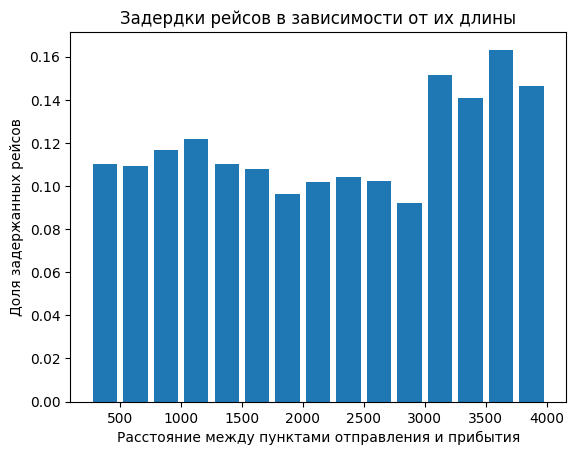

In [ ]:
plt.bar(np.arange(len(df_fd)) * 250 + 375, df_fd.rel_counts, 200)
plt.title('Задердки рейсов в зависимости от их длины')
plt.xlabel('Расстояние между пунктами отправления и прибытия')
plt.ylabel('Доля задержанных рейсов')

## Вывод
1. Рейсы длиной более 3000 задерживаются чаще